## fkit Tutorial Notebook

Welcome to the fkit quickstart notebook! Please refer to the GitHub README doc for further guidance

In [1]:
import fiberkit as fkit

## Step 1: Define Fibers

In [2]:
# define fibers
fiber_concrete = fkit.patchfiber.Hognestad(fpc=.85*25/1.5, take_tension=True)
fiber_steel    = fkit.nodefiber.Bilinear(fy=450/1.15, Es=210000)

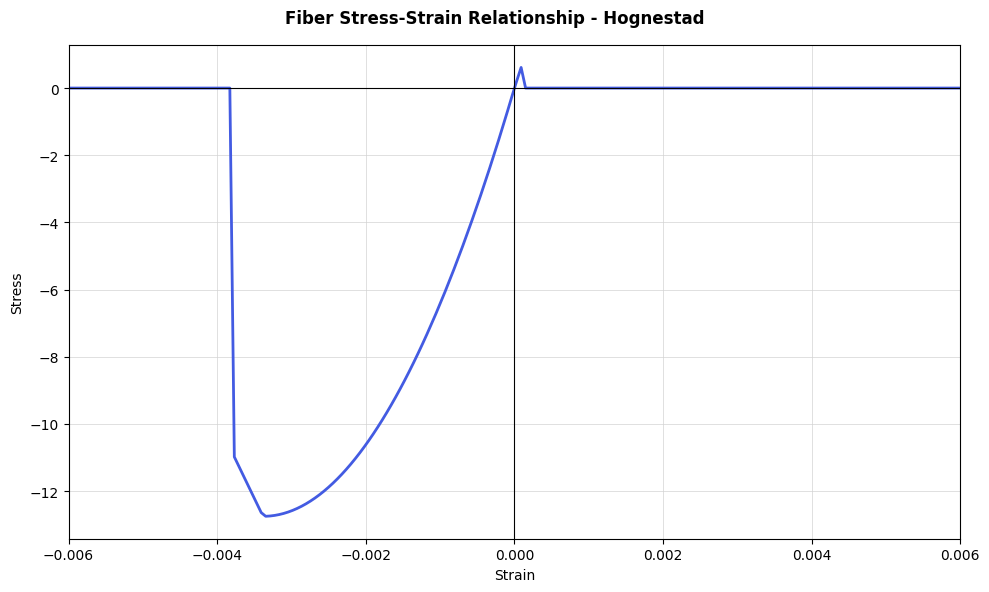

In [3]:
# preview fiber material property definition
fig = fkit.plotter.preview_fiber(fiber_concrete, x_limit=[-0.006, 0.006])

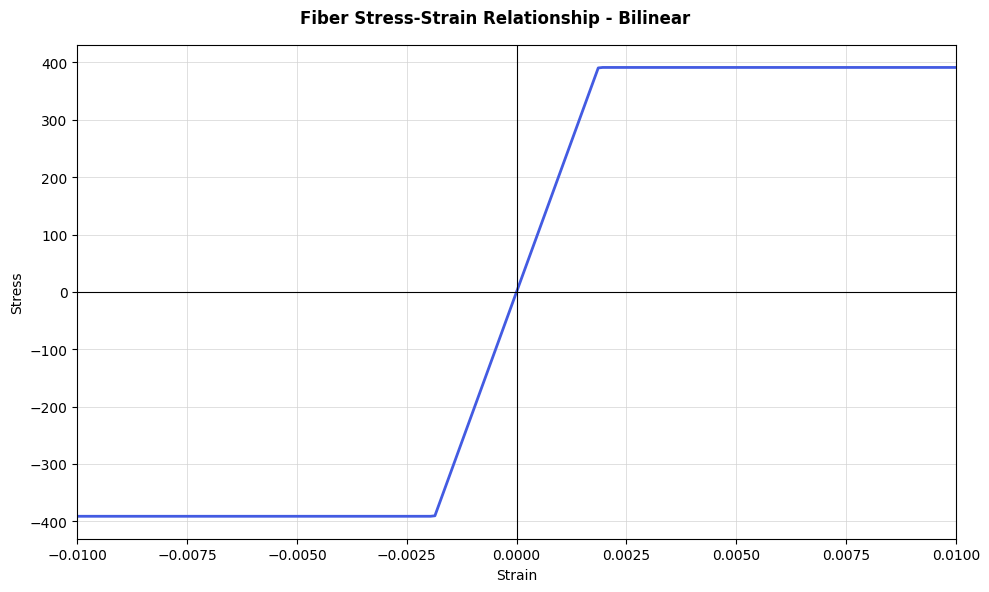

In [4]:
fig = fkit.plotter.preview_fiber(fiber_steel)

In [5]:
# if you need any help, remember you may access the docstring of any method using help() or ?
help(fkit.patchfiber.Hognestad)

Help on class Hognestad in module fiberkit.patchfiber:

class Hognestad(BasePatchFiber)
 |  Hognestad(fpc, Ec='default', eo='default', emax=0.0038, alpha=0, take_tension=False, fr='default', er='default', default_color='lightgray', vertices=None)
 |
 |  Modified Hognestad model based on Hognestad et al (1951). See Macgregor & Wight Textbook Ch 3.5
 |
 |  Input parameters: (ALL POSITIVE)
 |      fpc             concrete cylinder strength
 |                          - Peak stress will occur at 0.9fpc
 |                          - (ref A) 10% reduction accounts for difference between cylinder strength and member strength
 |
 |      Ec              (OPTIONAL) modulus of elasticity
 |                          - Automatically calculated if not specified. Unit is inferred:
 |                          - If fpc < 15 (unit ksi): Default = 57000 * sqrt(fpc*1000)/1000
 |                          - If fpc > 15 (unit MPa): Default = 4700 * sqrt(fpc)
 |
 |      eo              (OPTIONAL) strain at pe

## Step 2: Define Section

In [6]:
# create a rectangular beam section with SectionBuilder
section1 = fkit.sectionbuilder.rectangular(width = 300, 
                                           height = 500, 
                                           cover = 25, 
                                           top_bar = [201, 2, 1, 0], 
                                           bot_bar = [201, 4, 1, 0],  
                                           concrete_fiber = fiber_concrete, 
                                           steel_fiber = fiber_steel)

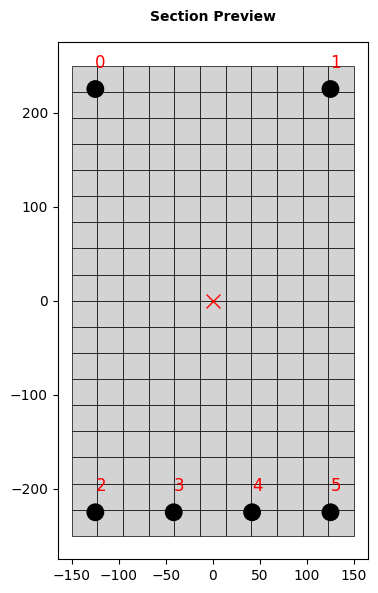

In [7]:
# preview section
fig = fkit.plotter.preview_section(section1, show_tag=True)

## Step 3: Moment Curvature Analysis 

In [8]:
# Estimate yield curvature which will be our target
depth = 500
phi_yield_approximate = 0.003 / (0.25*depth)
print(phi_yield_approximate)

2.4e-05


In [12]:
# start moment curvature analysis
MK_results = section1.run_moment_curvature(phi_target = phi_yield_approximate, P = -2.1e-6)

Deleting results from previous analysis...
Moment-curvature analysis completed. Elapsed time: 0.25 seconds



In [10]:
# calculate cracked moment of inertia
Icr_results = section1.calculate_Icr(Es=210000, Ec=31500)

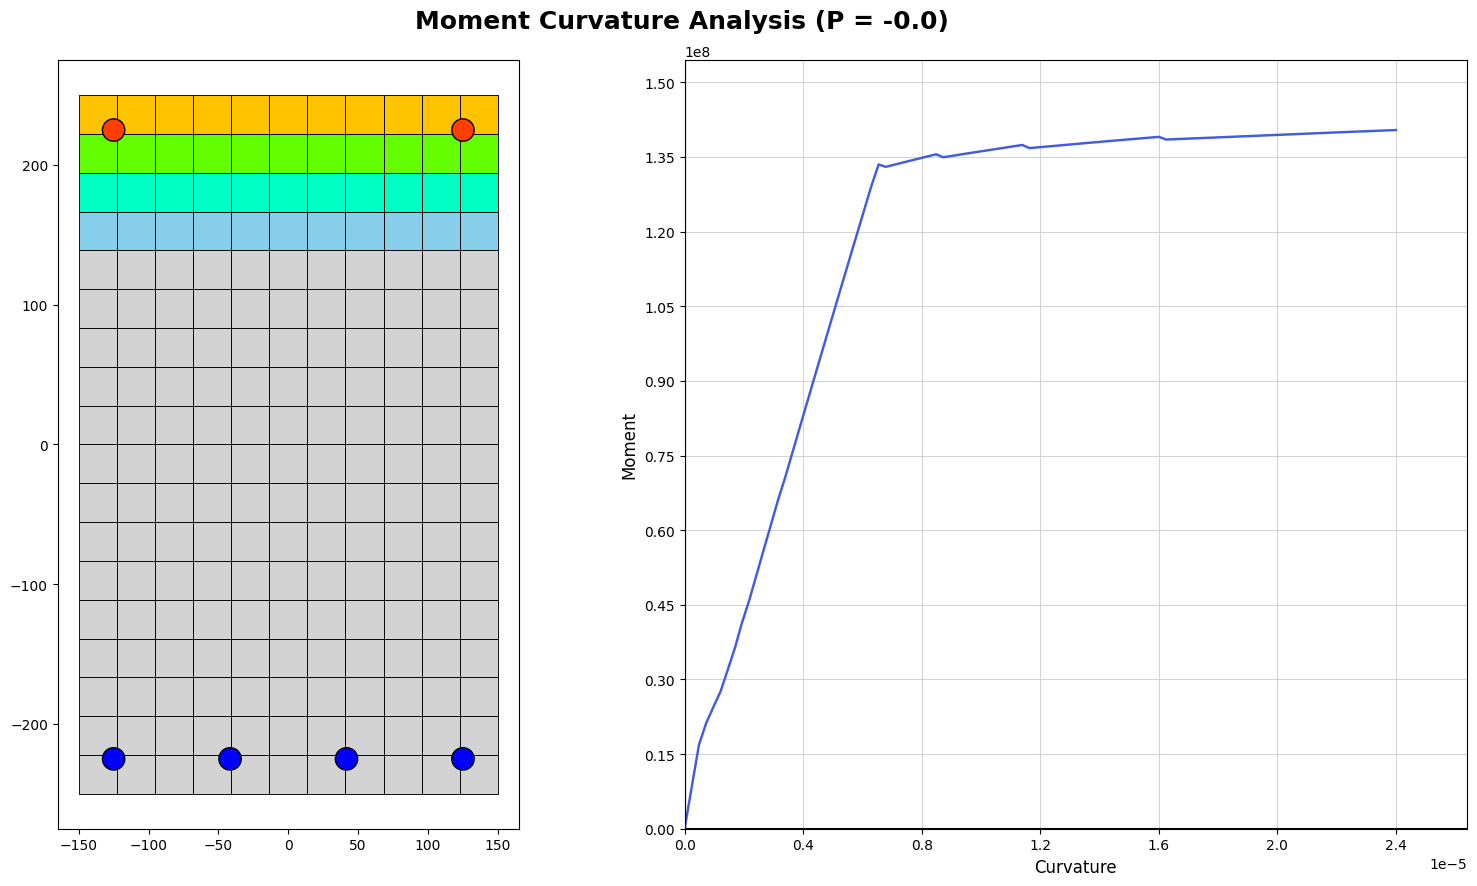

In [15]:
fig = fkit.plotter.plot_MK(section1)

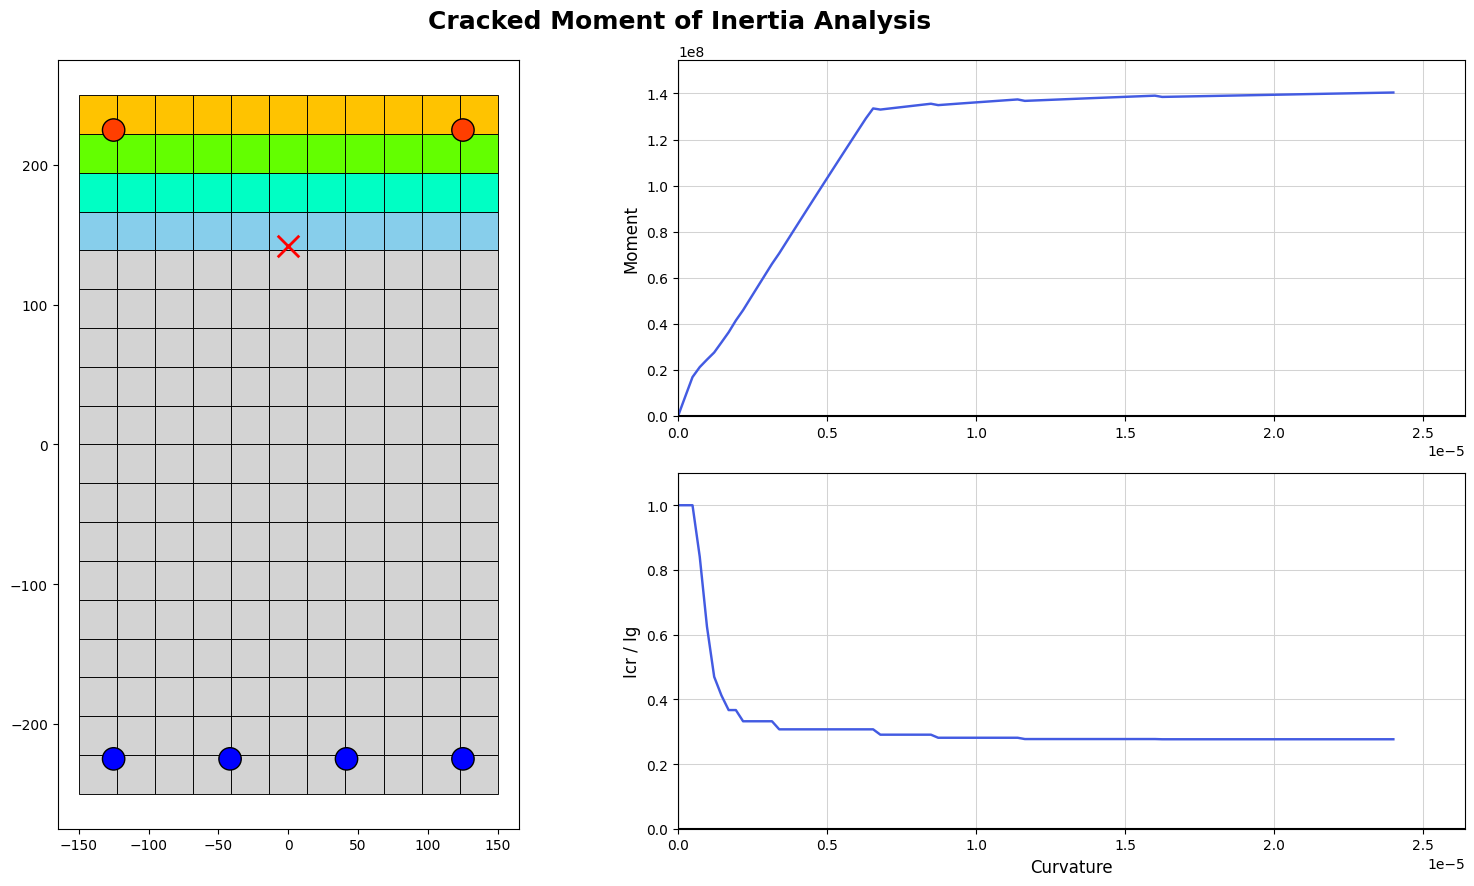

In [22]:
fig = fkit.plotter.plot_Icr(section1)

In [14]:
# new in v2.0.0. Plot moment curvature data in 3D interactive format in Plotly
fig = fkit.plotter.plot_MK_3D(section1)

Generating visualization at each load step...
	 step 1
	 step 2
	 step 3
	 step 4
	 step 5
	 step 6
	 step 7
	 step 8
	 step 9
	 step 10
	 step 11
	 step 12
	 step 13
	 step 14
	 step 15
	 step 16
	 step 17
	 step 18
	 step 19
	 step 20
	 step 21
	 step 22
	 step 23
	 step 24
	 step 25
	 step 26
	 step 27
	 step 28
	 step 29
	 step 30
	 step 31
	 step 32
	 step 33
	 step 34
	 step 35
	 step 36
	 step 37
	 step 38
	 step 39
	 step 40
	 step 41
	 step 42
	 step 43
	 step 44
	 step 45
	 step 46
	 step 47
	 step 48
	 step 49
	 step 50
	 step 51
	 step 52
	 step 53
	 step 54
	 step 55
	 step 56
	 step 57
	 step 58
	 step 59
	 step 60
	 step 61
	 step 62
	 step 63
	 step 64
	 step 65
	 step 66
	 step 67
	 step 68
	 step 69
	 step 70
	 step 71
	 step 72
	 step 73
	 step 74
	 step 75
	 step 76
	 step 77
	 step 78
	 step 79
	 step 80
	 step 81
	 step 82
	 step 83
	 step 84
	 step 85
	 step 86
	 step 87
	 step 88
	 step 89
	 step 90
	 step 91
	 step 92
	 step 93
	 step 94
	 step 95
	 step 96
	 s

## Step 4: PM Interaction Analysis

In [25]:
# start PM interaction
PM_results = section1.run_PM_interaction(fpc=0.85*25/1.5, fy=450/1.15, Es=210000)

Deleting results from previous analysis...
PM interaction analysis per ACI 318 completed. Elapsed time: 0.11 seconds



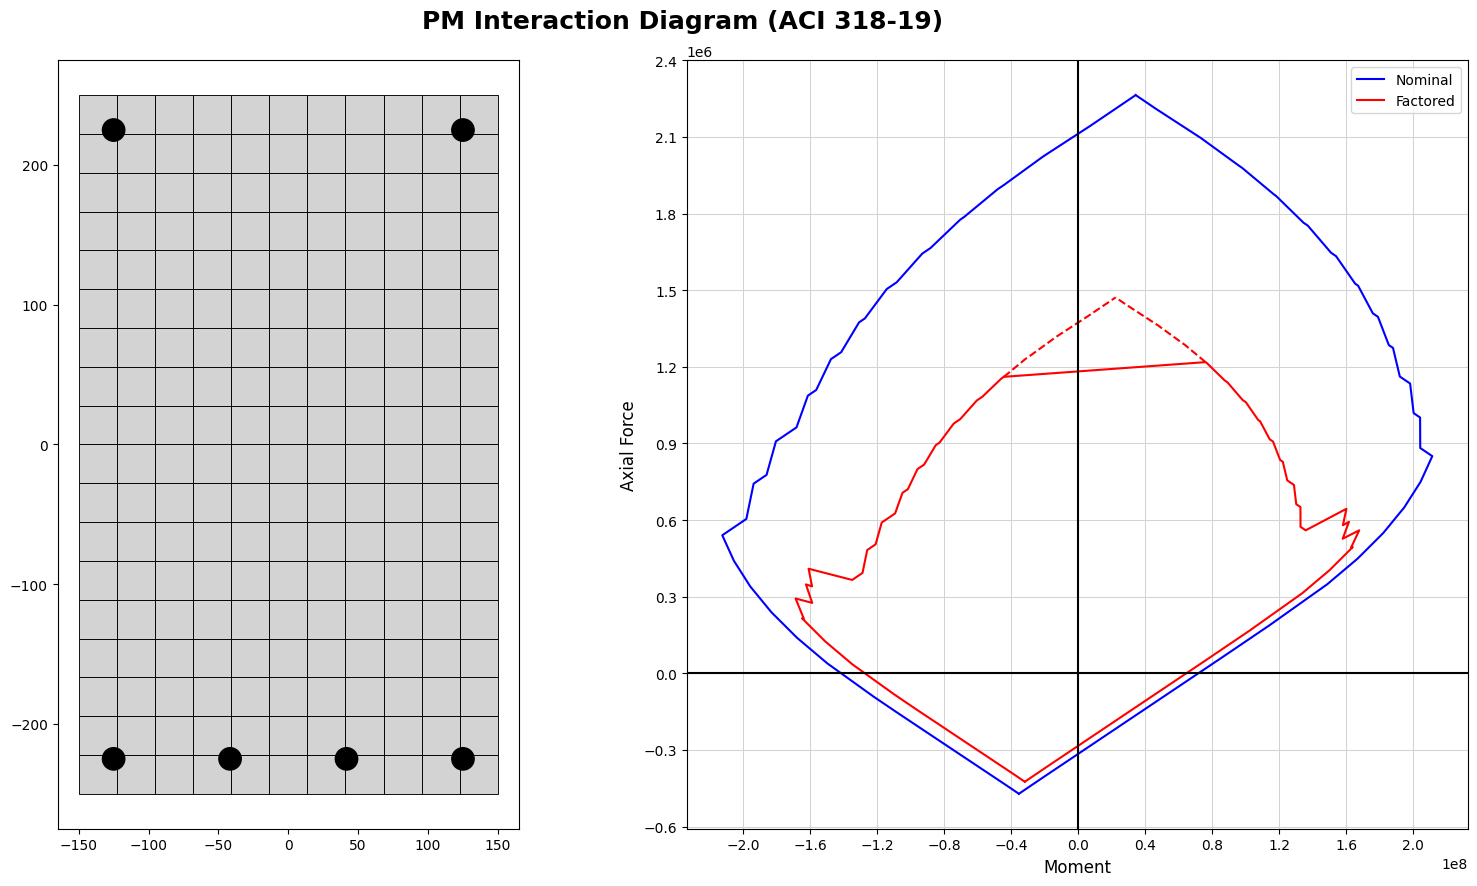

In [26]:
fig = fkit.plotter.plot_PM(section1)

## Step 5: Export data

In [18]:
section1.export_data()

Results to be exported to folder: C:\Users\wcfro\OneDrive\Documents\Python Scripts\jupyter_venv\exported_data_fkit
